We can model the motion of the quantum harmonic oscillator using the time independent Schrodinger equation

$$ -\frac{\hbar}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi(x)=E\psi(x) $$

Where potential $V(x) = \frac{1}{2}m\omega^2x^2$

We can defined the Energy eigenstates as:

$$ {\rm E}_n = (n + \frac{1}{2})\hbar\omega $$

With $n = 0,1,2,3,...$

We can define the wavefunctions that correspond to those energies as:

$$\psi_n(x) = {\rm N}_n{\rm e}^{-\beta^2x^2/2}{\rm H}_n(\beta x), n = 0,1,2,3,...$$

We define $\beta = \sqrt{m\omega/\hbar}$, and ${\rm N}_n$ represents the normalization constant, where ${\rm N}_n = (\sqrt{\pi}2^nn!)^{-1/2}$

${\rm H}_n$ represents the Hermite polynomials, which follow a recursion formula:

$$ {\rm H}_{n+1}(x) = 2x{\rm H}_n(x) - 2n{\rm H}_{n-1}(x)$$

So let's convince ourselfs that ${\rm H}_0 = 1$ and ${\rm H}_1=2x$, which will allow us to calculate the other hermite polynomials. 

#### Code
I copied from https://scipython.com/blog/the-harmonic-oscillator-wavefunctions/ just so I can get a grasp on how to code harmonic oscillators. 

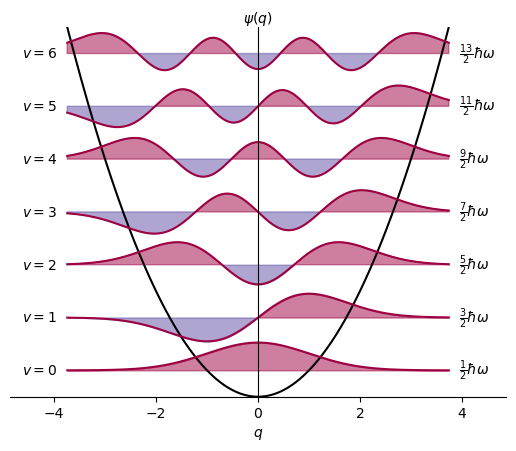

In [18]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt


# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 6

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = (0.6196, 0.0039, 0.2588, 1.0)
COLOUR2 = (0.3686, 0.3098, 0.6353, 1.0)

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, q):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    return N(v)*Hr[v](q)*np.exp(-q*q/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(q):
    """Return potential energy on scaled oscillator displacement grid q."""
    return q**2 / 2


fig, ax = plt.subplots()
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin, qmax, 500)
V = get_potential(q)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve above the offset is filled with COLOUR1; the curve below is
    filled with COLOUR2.

    """
    ax.plot(q, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.5)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR2, alpha=0.5)

# Plot the potential, V(q).
ax.plot(q, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, q)
    E_v = get_E(v)
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # The energy, E = (v+0.5).hbar.omega.
    ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*v+1), x=qmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$v={}$'.format(v), x=qmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(q)|^2$'
else:
    ylabel = r'$\psi(q)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$q$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

